### Title: How Student Minority Status Moderates Effects of Belonging Intervetion on GPA

## Background

Provide a paragraph motivating the project. Why should someone outside your field care about this research?

### Variables

Specify all variables, their data type, how they were collected, and number of observations.

**Subject ID** (EMPLID_H): Anonymize Participant identification

_Main Variables_
<br>**Race and Ethnicity** (ETHNIC_GROUP_CD): Self-reported (options: Asain, Black, Hispanic, White)
<br> **Minoritized Status**: Minoritized statusy calculated by dummy coding ETHNIC_GROUP_CD 
    <br>   - 0 is Non-minoritized (White)
    <br>    - 1 is Minoritized (Asian, Black, Hispanic)


2. **Belonging Intervention** (condition): Condition participants were randomly assignment to (dummy coded). 0 is the control group and 1 is the belonging intervention


| Variable            | Data Type   | Collection Method | Number of Observations                 |
|---------------------|-------------|-------------------|----------------------------------------|
| Race (Ethnic_group) | categorical | self-reported     | _Asian_ () <br> Black () Hispanic () White () |
|                     |             |                   |                                        |
|                     |             |                   |                                        |

| Syntax      | Description | Test Text     |
| :---        |    :----:   |          ---: |
| Header      | Title       | Here's this   |
| Paragraph   | Text        | And more      |

|V1        | Tweedledee     |  Tweedledum |
|--------  | -------------- | ------------|
|Age       |14              |14|
Height     3'2"             3'2"
Politics   Conservative     Conservative
Religion   "New Age"        Syrian Orthodox
---------  --------------   ----------------

### Hypotheses

Explicitly state your hypothesis in terms of the structure of the models that you will be evaluating (e.g., What is the form of Y = f(X) for each hypothesis? Will you be using linear regression or classifier models?)

Hypothesis 1a: Students who receive the Belonging Intervetion will have higher GPA 
$$ Y_{GPA} = \hat{\beta}_0 + \hat{\beta}_1X_{Intervention}$$

Hypothesis 1b: Student minoritzed status moderates the effects of the Belonging intervention on GPA 
$$ Y_{GPA} = \hat{\beta}_0 + \hat{\beta}_1X_{Intervention} + \hat{\beta}_2M_{o\;Minoritized\,Status} + \hat{\beta}_3X_{Intervention}M_{o\;Minoritized\,Status}$$

<img src="moderation.png" alt="Drawing" style="width: 600px;"/>
$$\small \text Figure 1. Moderation Model$$

```{figure} moderation.png
---
height: 150px
name: Moderation Model
---
Here is my figure caption!
```

### Data Organization

Provide descriptions of Data Architecture (e.g., how is the data organized), Data Cleansing & Tidying, and an example of the final of the Data Table(s) that will go into your analysis.

Raw data includes: 1123 observations and 160 variables
End data had 520 observations with 5 variables

Data Cleansing Step:
    1. Mutate Race and Ethnicity variable to new Dummy Coded `minoritize_status` variable
    2. Mutate the 3 sense of belonging items by taking the mean and creating new `sense_of_belonging` variable
    3. Selected all other variables of interest in addition to the 2 created variables above
    4. Converted `EMPLID_H` (participant ID variable) from strings to intergers
    5. Removed all particpant with missing values for variables of interest
    7. Removed 1 participants with GPA (dependent variable) of 0.00 as this was an integrity constraint violations
    8. Saved dataframe as new .csv file

### Resulting Tidy-Compliant Data Table

In [ ]:
blngdata <-read.csv("~/Documents/Elie_DSPN_S22/Final_Project/cleaned_blng19.csv")
head(blngdata)

### Analysis

### Statistical Plan

Descriptive statistics and visualizations for GPA and Sense of Belonging
Mixed Effects Model for Inference
 - cross validation
 - bootstrapping
Moderation Model for Inference
 - cross validation
 - boostraping
Bayes Factor


### Distribution of Student GPA and Sense of Belonging

In [ ]:
#library setup
library(tidyverse) |> suppressMessages()
library(ggpubr)
library(ggplot2)
library(gtsummary)  |> suppressMessages()
library(gridExtra) |> suppressMessages()
library(grid)
library(gtable) |> suppressMessages()

In [ ]:
#setting condition as factor
blngdata$condition <- as.factor(blngdata$condition)
#levels(blngdata$condition) #checking that levels are control , standard (which is the intervention)
#levels(blngdata$condition) <- c(0,1)

#control group gpa
ctrl_group <-filter(blngdata, condition == "0")
control_gpa <-group_by(ctrl_group) %>% summarize (
    N = n(),
    Mean = mean(GPA),
    SD = sd(GPA),
    Min = min(GPA),
    Max = max(GPA))

#intervention group gpa
trt_group <-filter(blngdata, condition == "1")
trt_gpa <-group_by(trt_group) %>% summarize (
    N = n(),
    Mean = mean(GPA),
    SD = sd(GPA),
    Min = min(GPA),
    Max = max(GPA))
desc_gpa <- rbind(control,trt)

desc_gpa <-data.frame(round(total, 3))
rownames(desc_gpa)=c("Control", "Belonging Intervention")

In [ ]:
#control group belonging
control_blng <-group_by(ctrl_group) %>% summarize (
    N = n(),
    Mean = mean(sense_of_blng),
    SD = sd(sense_of_blng),
    Min = min(sense_of_blng),
    Max = max(sense_of_blng))

#intervention group belonging
trt_blng <-group_by(trt_group) %>% summarize (
    N = n(),
    Mean = mean(sense_of_blng),
    SD = sd(sense_of_blng),
    Min = min(sense_of_blng),
    Max = max(sense_of_blng))
desc_blng <- rbind(control_blng,trt_blng)
desc_blng<- data.frame(round(total, 3))
rownames(desc_blng)=c("Control", "Belonging Intervention")

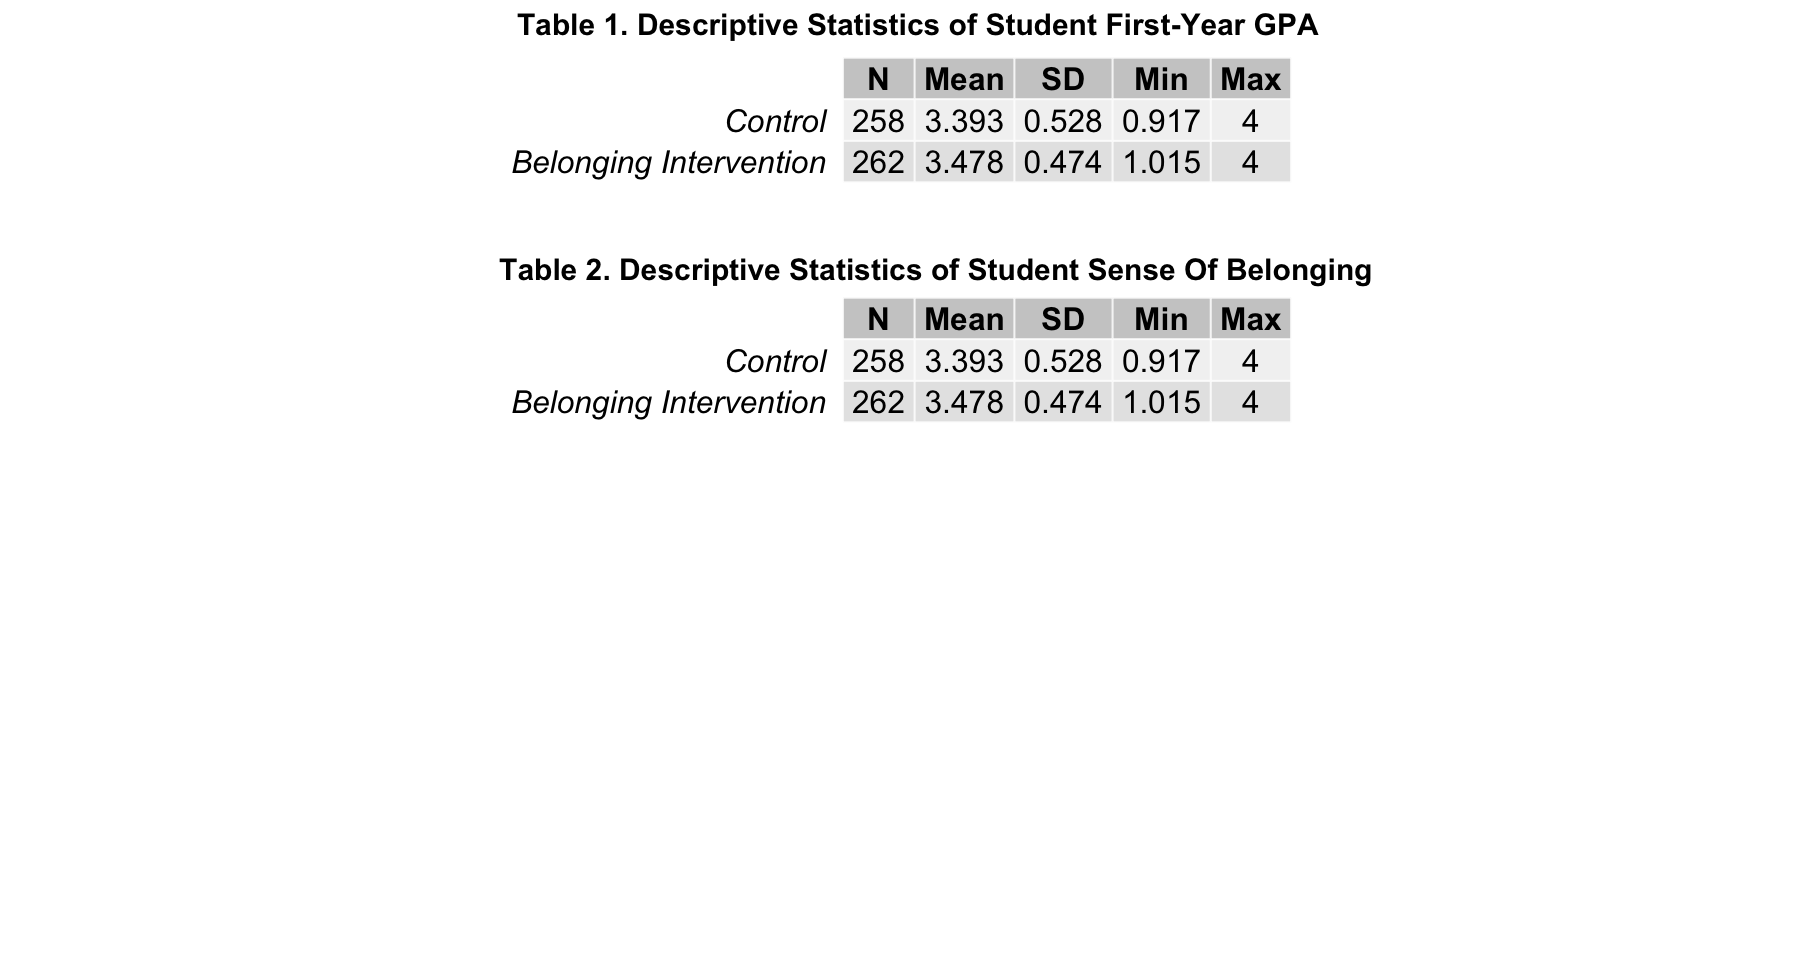

In [233]:
tt1 = ttheme_default(19)
#tt2 = ttheme_minimal(base_size = 18)
grid.arrange(
    tableGrob(desc_gpa, theme=tt1), 
    tableGrob(desc_blng,theme=tt1),
    textGrob("Table 1. Descriptive Statistics of Student First-Year GPA", 
                   gp = gpar(fontsize = 18,fontface="bold"), x = unit(.51, "npc"), y = unit(2.9, "npc")),
    textGrob("Table 2. Descriptive Statistics of Student Sense Of Belonging", 
                   gp = gpar(fontsize = 18,fontface="bold"), x = unit(.52, "npc"), y = unit(2.88, "npc")),
    ncol=1)



In [ ]:
options(repr.plot.width=15, repr.plot.height=8)
gghistogram(blngdata, x = "GPA", bins = 19,
       add = "mean", rug = TRUE , add_density = TRUE,
       fill = "condition", color="condition", 
       xlab = "Student First-Year GPA",
       alpha = .45) +
       scale_fill_manual(name = "Condition",
                         values = c("#7570B3", "#FC4E07"),
                         labels = c("Control", "Belonging Intervention")) +
       scale_color_manual(name = "Condition",
                          values = c("#7570B3", "#FC4E07"),
                          labels = c("Control", "Belonging Intervention")) +
       theme_minimal() +
       theme(axis.title.x = element_text(size=15,hjust = 0.5, face="bold"),
             axis.text.x = element_text(size=15,hjust = 0.5, face="bold"),
             axis.text.y = element_text(size=15,hjust = 0.5, face="bold"),
             axis.title.y = element_text(size=15,hjust = 0.5),
             legend.title = element_text(size=15,hjust = 0.5, face="bold"),
             legend.text = element_text(size=15,hjust = 0.5, face="bold"),
             legend.position = "top",
             aspect.ratio =1)

In [ ]:
The distribution of student GPA is highly skewed to the left with the majority of students fairing between 3 and 4 grade point average


Show both your data visualizations and summarize the results from your models. 

Predicted Value: $$ \hat{Y}_{GPA} = \hat{ \beta}_0 + \hat{ \beta}_1X_{Sense\,of\,Belonging} + \hat{ \beta}_2X_{Intervention}M_{o\; Minoritized\,Status}$$
$$ Y_{GPA} = { \beta}_0 + { \beta}_1X_{Sense\,of\,Belonging} + { \beta}_2X_{Intervention}M_{o\; Minoritized\,Status}$$


### Conclusions

A short (1 paragraph) conclusion with respect to the models you have run.